In [33]:
import pickle
import pandas as pd
regressor = pickle.load( open( "saved_model", "rb" ) )
regressor


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [56]:
grid_processed = pd.read_csv("./data/grid_processed.csv", index_col=0)

In [57]:
grid_processed['budynki_niemieszkalne_9'] = grid_processed['budynki_all_9'] - grid_processed['budynki_mieszkalne_9']
grid_processed['populacja_na_budynek_9'] = grid_processed['populacja_razem_9'] - grid_processed['budynki_mieszkalne_9']
grid_processed['budynki_niemieszkalne_na_populacje_9'] = grid_processed['budynki_niemieszkalne_9'] / (grid_processed['populacja_razem_9'] + 1)

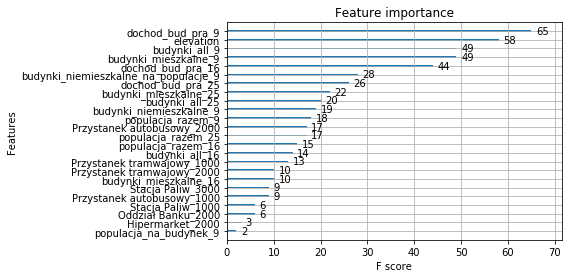

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_importance(regressor)
plt.show()


In [11]:
sorted([tup for tup in zip(X_grid.columns, regressor.feature_importances_)], key=lambda x: x[1])

[('Oddział Banku_1000', 0.0),
 ('Hipermarket_1000', 0.0),
 ('populacja_na_budynek_9', 0.0037807184),
 ('Hipermarket_2000', 0.0056710774),
 ('Oddział Banku_2000', 0.011342155),
 ('Stacja Paliw_1000', 0.011342155),
 ('Przystanek autobusowy_1000', 0.017013233),
 ('Stacja Paliw_3000', 0.017013233),
 ('budynki_mieszkalne_16', 0.018903593),
 ('Przystanek tramwajowy_2000', 0.018903593),
 ('Przystanek tramwajowy_1000', 0.02457467),
 ('budynki_all_16', 0.026465029),
 ('populacja_razem_16', 0.028355388),
 ('populacja_razem_25', 0.032136105),
 ('Przystanek autobusowy_2000', 0.032136105),
 ('populacja_razem_9', 0.034026466),
 ('budynki_niemieszkalne_9', 0.035916824),
 ('budynki_all_25', 0.037807185),
 ('budynki_mieszkalne_25', 0.0415879),
 ('dochod_bud_pra_25', 0.04914934),
 ('budynki_niemieszkalne_na_populacje_9', 0.052930057),
 ('dochod_bud_pra_16', 0.0831758),
 ('budynki_all_9', 0.0926276),
 ('budynki_mieszkalne_9', 0.0926276),
 ('elevation', 0.10964083),
 ('dochod_bud_pra_9', 0.12287334)]

In [58]:
center_squares = grid_processed.iloc[[30, 31, 40, 41]].copy()
suburb_squares = grid_processed.iloc[[18, 19, 28, 29]].copy()

In [59]:
suburb_squares['budynki_mieszkalne_9'] += 5
suburb_squares['budynki_all_9'] += 9
suburb_squares['populacja_razem_9'] += 2000
suburb_squares['budynki_mieszkalne_16'] += 6
suburb_squares['budynki_all_16'] += 10
suburb_squares['populacja_razem_16'] += 2400
suburb_squares['budynki_mieszkalne_25'] += 7
suburb_squares['budynki_all_25'] += 12
suburb_squares['populacja_razem_25'] += 3000
suburb_squares['Przystanek autobusowy_1000'] += 3
suburb_squares['Przystanek autobusowy_2000'] += 4

In [60]:
center_squares['Przystanek tramwajowy_1000'] += 5
center_squares['Przystanek tramwajowy_2000'] += 8
center_squares['Przystanek autobusowy_1000'] -= 5
center_squares['Przystanek autobusowy_2000'] -= 8

In [61]:
changed_squares = pd.concat([suburb_squares, center_squares])
changed = changed_squares[['longitude', 'latitude']]
changed_squares = changed_squares.drop(['longitude', 'latitude'], axis=1)
changed_out = regressor.predict(changed_squares)
# changed = grid_processed[['longitude', 'latitude']].iloc[[30, 31, 40, 41, 18, 19, 28, 29]].copy()
changed['pm25'] = changed_out
changed.to_csv('changed.csv')

In [52]:
changed

,longitude,latitude,pm25
0,,,
18,20.046654,50.009434,59.700920
19,20.074111,50.009434,55.554546
28,20.046654,50.020389,56.151867
29,20.074111,50.020389,41.996479
30,19.826993,50.031343,42.048580
31,19.854451,50.031343,56.349037
40,19.826993,50.042298,57.980022
41,19.854451,50.042298,41.616074


In [62]:
before_change = pd.read_csv("./out.csv", index_col=0)
before_change = before_change[['longitude', 'latitude', 'pm25']].iloc[[18, 19, 28, 29, 30, 31, 40, 41]]
before_change.to_csv("before_change.csv")
before_change

,longitude,latitude,pm25
0,,,
18,20.046654,50.009434,56.005200
19,20.074111,50.009434,53.822834
28,20.046654,50.020389,56.787270
29,20.074111,50.020389,42.012455
30,19.826993,50.031343,41.720165
31,19.854451,50.031343,56.375930
40,19.826993,50.042298,57.937084
41,19.854451,50.042298,41.287660


In [63]:
change = before_change.copy()
change['pm25'] -= changed['pm25']
change.to_csv("change.csv")
change

,longitude,latitude,pm25
0,,,
18,20.046654,50.009434,-3.695720
19,20.074111,50.009434,-1.731712
28,20.046654,50.020389,0.635403
29,20.074111,50.020389,0.015976
30,19.826993,50.031343,-0.328415
31,19.854451,50.031343,0.026893
40,19.826993,50.042298,-0.042938
41,19.854451,50.042298,-0.328414
